# Churn Reduction (loss of customers to competition)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix


In [2]:
import os
os.chdir("E:\Data_science\Projects\churnproject")
os.getcwd()

'E:\\Data_science\\Projects\\Edwisor_Final_project\\churnproject'

In [3]:
data_train = pd.read_csv("Train_data.csv") #load train data

In [26]:
data_test = pd.read_csv('Test_data.csv')   #load test data

In [4]:
data_train.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


#  Exploratory Data Analysis

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                            3333 non-null object
account length                   3333 non-null int64
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total night charge               3333 non-null float64
total intl minutes           

In [6]:
data_train.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

In [7]:
data_train.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
data_train.shape

(3333, 21)

In [8]:
from collections import Counter
Counter(data_train.Churn)

Counter({' False.': 2850, ' True.': 483})

In [ ]:
print(data_train.isnull().sum())

In [27]:
 Counter(data_test.Churn)

Counter({' False.': 1443, ' True.': 224})

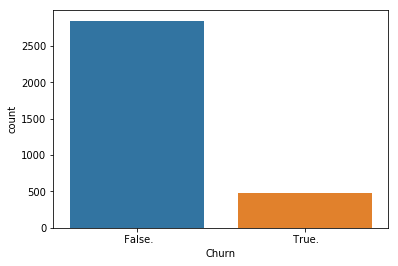

In [47]:
sns.countplot(data_train['Churn'],label = 'count')

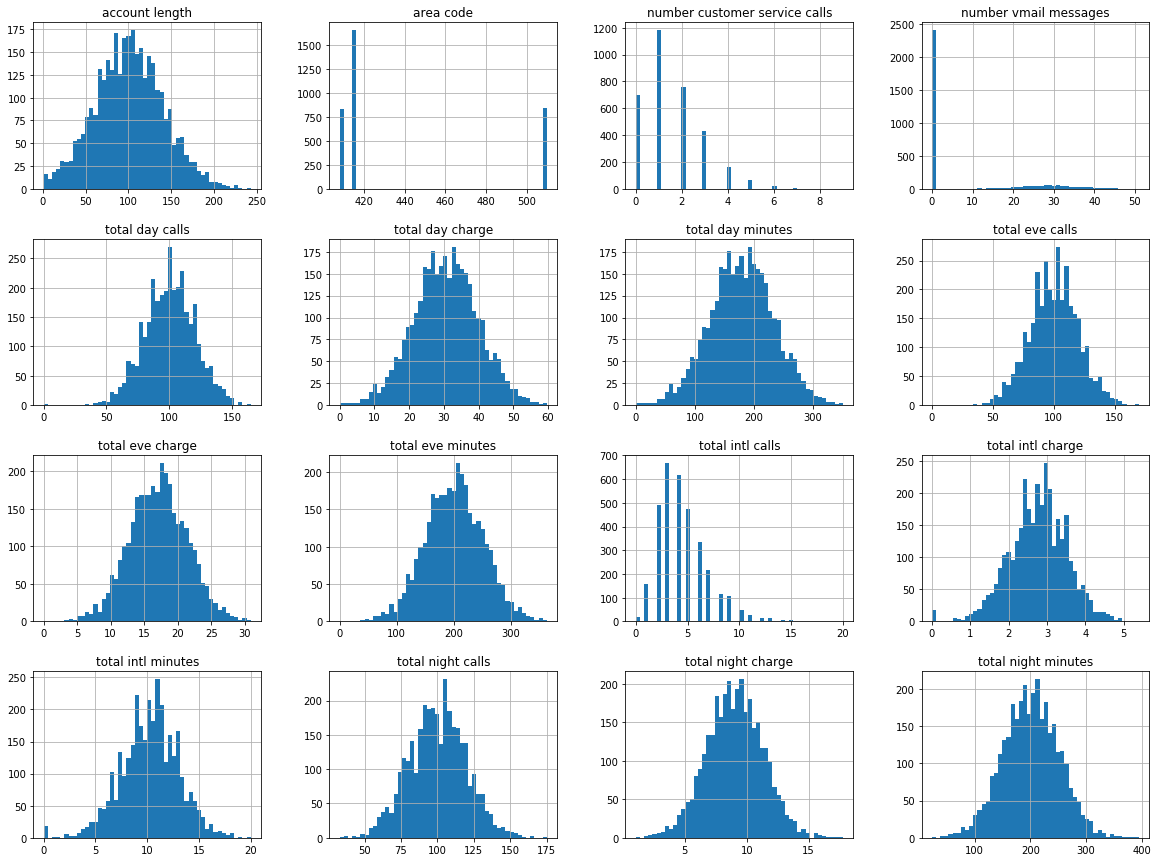

In [48]:
data_train.hist(bins=50, figsize=(20,15));


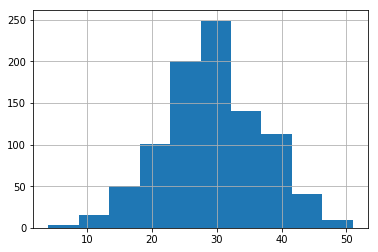

In [49]:
df1 = data_train[data_train['number vmail messages'] > 0]
df1['number vmail messages'].hist(bins=10);

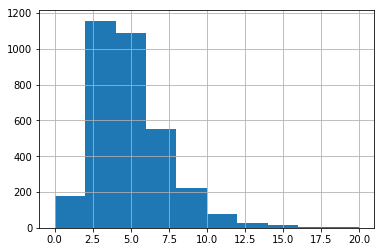

In [50]:
data_train['total intl calls'].hist(bins=10);

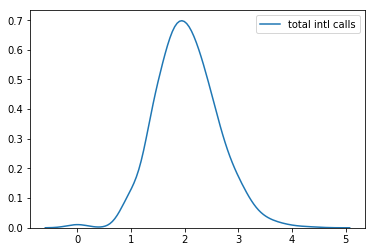

In [52]:
#frquency plot
sns.kdeplot(np.sqrt(data_train['total intl calls']), bw=0.2)

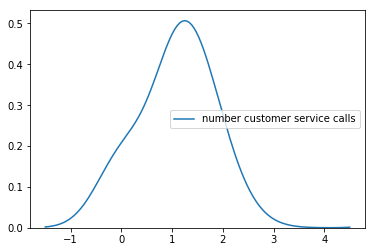

In [54]:
sns.kdeplot(np.sqrt(data_train['number customer service calls']), bw=0.5)

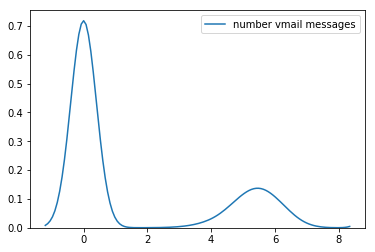

In [55]:
sns.kdeplot(np.sqrt(data_train['number vmail messages']), bw=0.4)

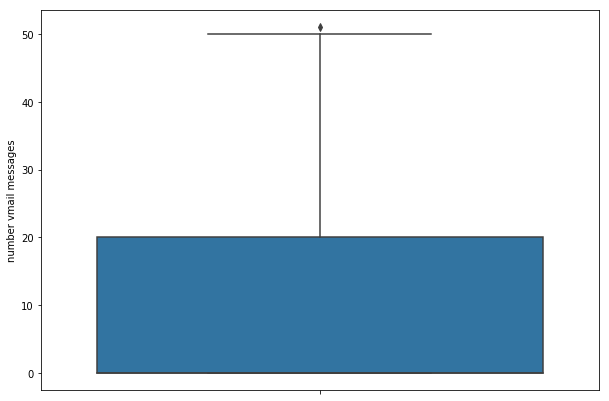

In [59]:
plt.figure(figsize=(10,7))
sns.boxplot((data_train['number vmail messages']), orient = "v")

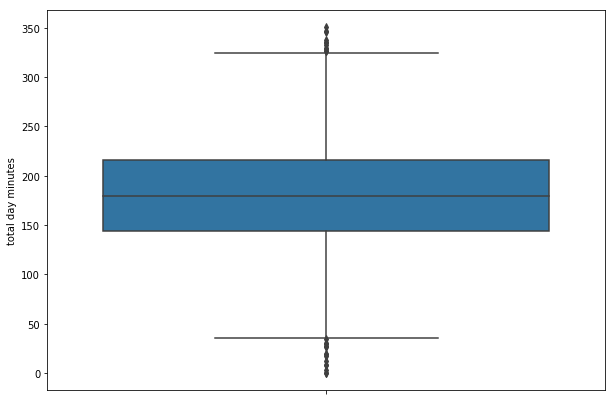

In [60]:
plt.figure(figsize=(10,7))
sns.boxplot((data_train['total day minutes']),orient = "v")

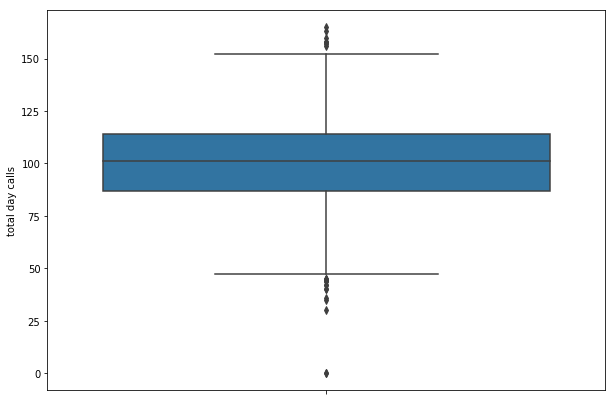

In [61]:
plt.figure(figsize=(10,7))
sns.boxplot((data_train['total day calls']),orient = "v")

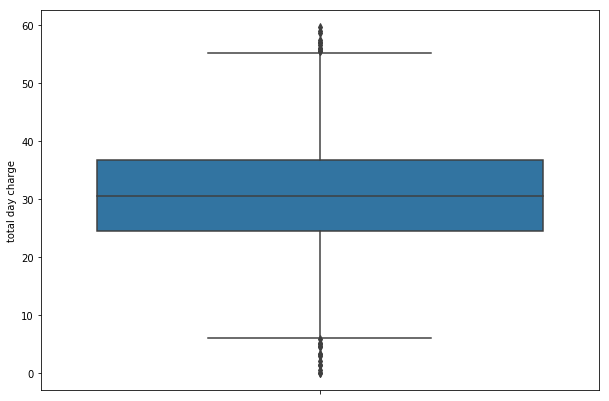

In [62]:
plt.figure(figsize=(10,7))
sns.boxplot((data_train['total day charge']),orient = "v")

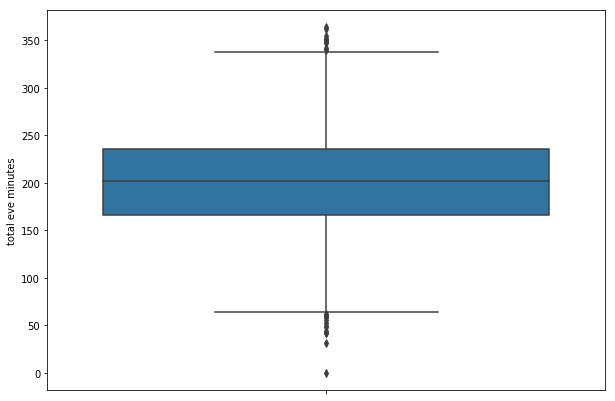

In [63]:
plt.figure(figsize=(10,7))
sns.boxplot((data_train['total eve minutes']),orient = "v")

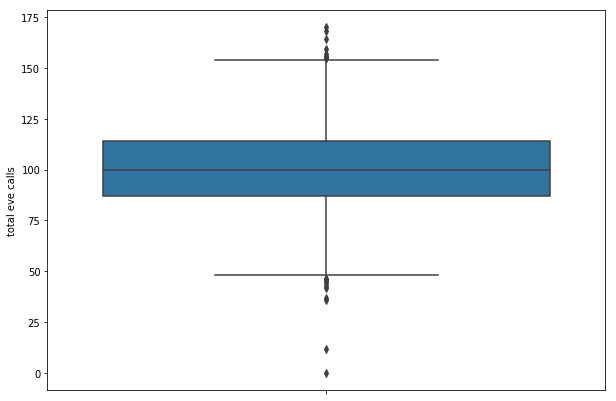

In [64]:
plt.figure(figsize=(10,7))
sns.boxplot((data_train['total eve calls']),orient = "v")

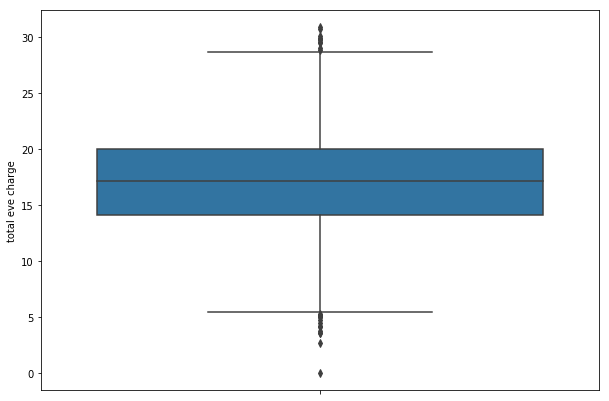

In [65]:
plt.figure(figsize=(10,7))
sns.boxplot((data_train['total eve charge']),orient = "v")

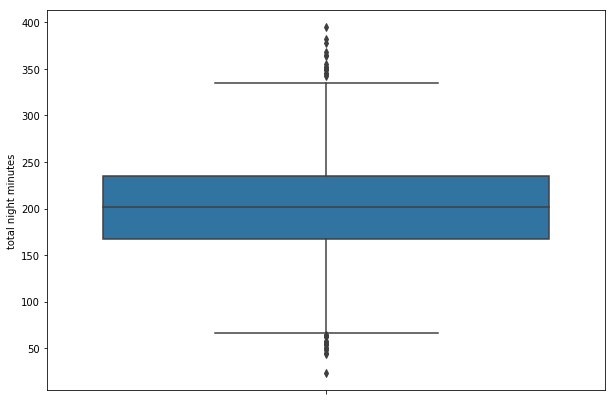

In [66]:
plt.figure(figsize=(10,7))
sns.boxplot((data_train['total night minutes']),orient = "v")

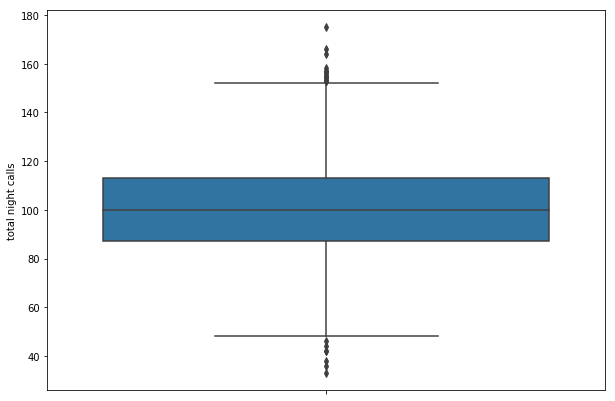

In [67]:
plt.figure(figsize=(10,7))
sns.boxplot((data_train['total night calls']),orient = "v")

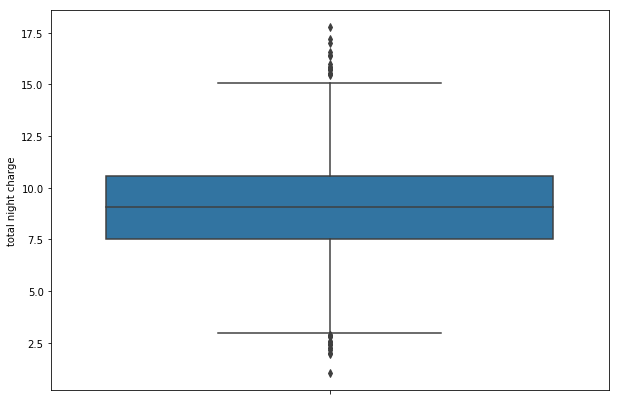

In [68]:
plt.figure(figsize=(10,7))
sns.boxplot((data_train['total night charge']),orient = "v")

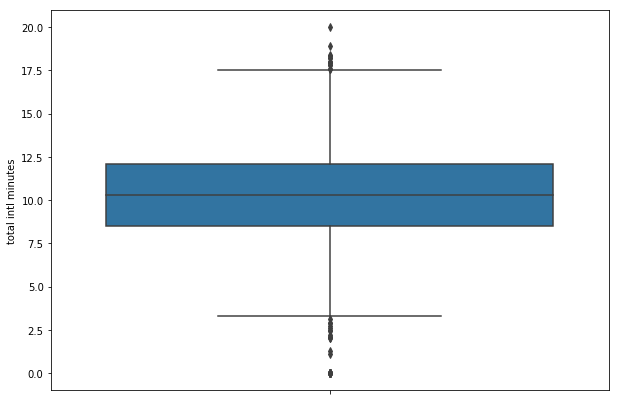

In [69]:
plt.figure(figsize=(10,7))
sns.boxplot((data_train['total intl minutes']),orient = "v")

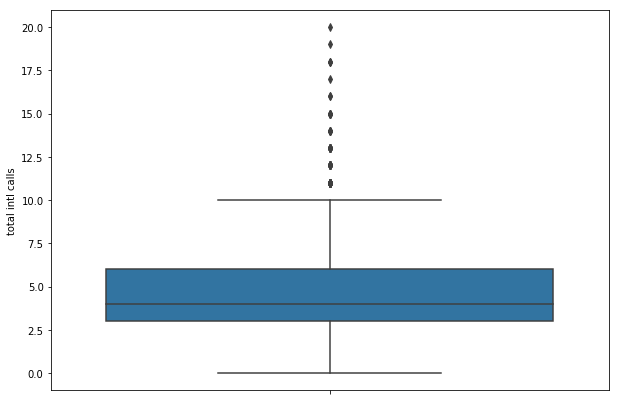

In [70]:
plt.figure(figsize=(10,7))
sns.boxplot((data_train['total intl calls']),orient = "v")

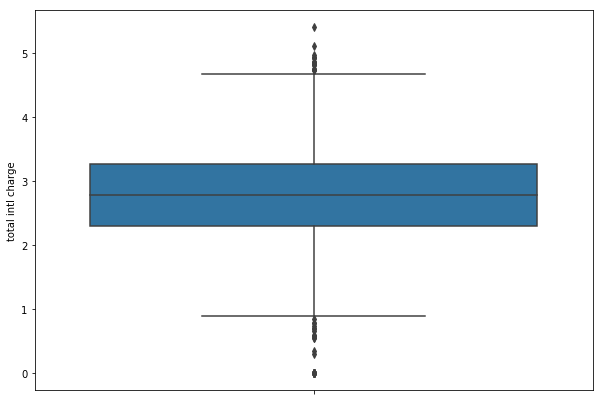

In [71]:
plt.figure(figsize=(10,7))
sns.boxplot((data_train['total intl charge']),orient = "v")

# Data preprocessing

In [9]:
data_train1 = data_train.drop(["area code","phone number"],axis=1)

In [28]:
data_test1 = data_test.drop(["area code","phone number"],axis=1)

In [10]:
data_train1 = pd.get_dummies(data_train1, columns=['state'])


In [29]:
data_test1 = pd.get_dummies(data_test1, columns=['state'])

In [11]:
data_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 69 columns):
account length                   3333 non-null int64
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total night charge               3333 non-null float64
total intl minutes               3333 non-null float64
total intl calls                 3333 non-null int64
total intl charge                3333 non-null float64
number customer service cal

In [12]:
X = data_train1.drop(['Churn'],axis=1).values
y = data_train1['Churn'].values

In [30]:
X_t = data_test1.drop(['Churn'],axis=1).values
y_t = data_test1['Churn'].values

In [13]:
data_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 69 columns):
account length                   3333 non-null int64
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total night charge               3333 non-null float64
total intl minutes               3333 non-null float64
total intl calls                 3333 non-null int64
total intl charge                3333 non-null float64
number customer service cal

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

In [32]:
X_t[:, 1] = labelencoder_X.fit_transform(X_t[:, 1])
X_t[:, 2] = labelencoder_X.fit_transform(X_t[:, 2])

In [15]:
labelencoder_y = LabelEncoder()
y=labelencoder_y.fit_transform(y)

In [33]:
y_t=labelencoder_y.fit_transform(y_t)

Feature Scaling the training and testing data

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)


C:\Users\Gamma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Gamma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [34]:
X_test = sc.fit_transform(X_t)

C:\Users\Gamma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Gamma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
y[1:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

# Modeling data with RandomForest with grid search method

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier=RandomForestClassifier(random_state=33,n_estimators=23)

gridparameters = {'min_samples_split':[2,3,4], 'criterion':['gini','entropy'], 'min_samples_leaf':[1,2,3]}
grid = GridSearchCV(estimator=classifier, param_grid = gridparameters, scoring='accuracy',cv=10)
grid.fit(X_train,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=23, n_jobs=1,
            oob_score=False, random_state=33, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [36]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=23, n_jobs=1,
            oob_score=False, random_state=33, verbose=0, warm_start=False)

In [37]:
grid.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4}

In [38]:
grid_predictions = grid.predict(X_test)

# Model Evaluation

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [40]:
accuracy = accuracy_score(y_t,grid_predictions)
accuracy

0.9466106778644271

Text(0.5,15,'Predicted value')

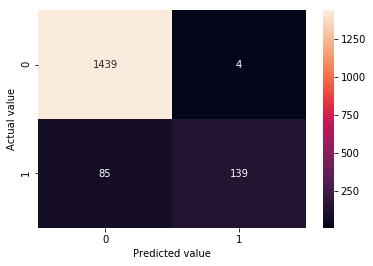

In [42]:
cm = confusion_matrix(y_t, grid_predictions)
sns.heatmap(cm,annot=True,fmt="d")
plt.ylabel('Actual value')
plt.xlabel('Predicted value')

In [72]:
print(classification_report(y_t, grid_predictions))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      1443
          1       0.97      0.62      0.76       224

avg / total       0.95      0.95      0.94      1667



In [ ]:
#Thank you